## Import necessary libraries and install that does prebuilt

In [2]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.0/247.0 kB 10.6 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
import optuna
from optuna.samplers import TPESampler
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

## import collab filer importer to fetch from =local

In [ ]:
#google collab file import
from google.colab import files
#upload files
uploaded = files.upload()

Saving hypertension_data.csv to hypertension_data (1).csv


In [ ]:
df = pd.read_csv('hypertension_data.csv')

In [ ]:
df.columns

Index(['age', 'gender', 'systolic_bp', 'diastolic_bp', 'bmi', 'glucose_level',
       'cholesterol', 'smoker', 'alcohol_use', 'physical_activity',
       'med_adherence', 'risk_score'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'risk_score': 'hypertension'})

In [ ]:
print ("data shape:", df.shape)

data shape: (500, 12)


In [ ]:
df.head()

,age,gender,systolic_bp,diastolic_bp,bmi,glucose_level,cholesterol,smoker,alcohol_use,physical_activity,med_adherence,hypertension
0,68,Female,142.511761,102.452282,28.052850,70.000000,300.000000,1,1,1,1,1
1,58,Male,107.568212,71.060017,29.562498,138.892670,208.413120,0,0,0,0,1
2,44,Male,144.701882,73.295475,25.396126,86.531929,221.485869,0,1,1,0,0
3,72,Male,93.749487,94.602847,26.986992,77.609279,195.617258,0,0,0,0,0
4,37,Female,181.839504,91.041524,30.730937,136.563769,210.080560,0,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                500 non-null    int64  
 1   gender             500 non-null    object 
 2   systolic_bp        500 non-null    float64
 3   diastolic_bp       500 non-null    float64
 4   bmi                500 non-null    float64
 5   glucose_level      500 non-null    float64
 6   cholesterol        500 non-null    float64
 7   smoker             500 non-null    int64  
 8   alcohol_use        500 non-null    int64  
 9   physical_activity  500 non-null    int64  
 10  med_adherence      500 non-null    int64  
 11  hypertension       500 non-null    int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 47.0+ KB


In [ ]:
df.describe()

,age,systolic_bp,diastolic_bp,bmi,glucose_level,cholesterol,smoker,alcohol_use,physical_activity,med_adherence,hypertension
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,55.406000,136.344891,85.068637,27.285057,113.910136,212.295223,0.286000,0.384000,0.610000,0.664000,0.374000
std,14.608353,20.564706,15.083589,4.969841,27.417424,30.124671,0.452342,0.486845,0.488238,0.472812,0.484348
min,30.000000,90.000000,60.000000,18.000000,70.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,123.063407,74.244686,23.760579,93.326526,191.325248,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,136.703554,84.716601,27.063959,114.261068,212.789062,0.000000,0.000000,1.000000,1.000000,0.000000
75%,68.000000,149.979220,96.020033,30.885170,131.251351,231.835565,1.000000,1.000000,1.000000,1.000000,1.000000
max,80.000000,198.488843,120.000000,40.000000,197.700669,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
age,0
gender,0
systolic_bp,0
diastolic_bp,0
bmi,0
glucose_level,0
cholesterol,0
smoker,0
alcohol_use,0
physical_activity,0


In [ ]:
df.dtypes

,0
age,int64
gender,object
systolic_bp,float64
diastolic_bp,float64
bmi,float64
glucose_level,float64
cholesterol,float64
smoker,int64
alcohol_use,int64
physical_activity,int64


In [ ]:
df["hypertension"].value_counts()

,count
hypertension,
0,313
1,187


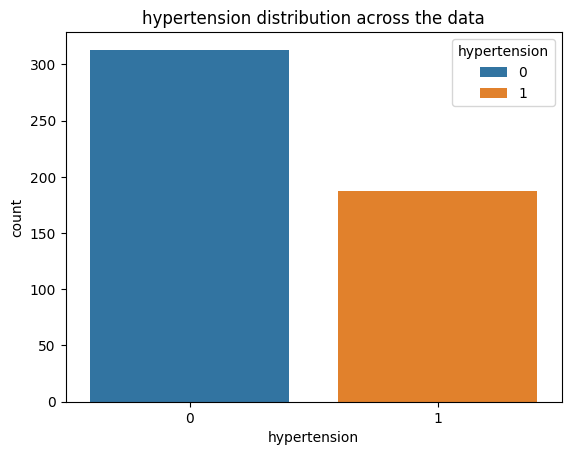

In [ ]:
sns.countplot(data = df, x= 'hypertension', hue = 'hypertension')
plt.title('hypertension distribution across the data')
plt.show()

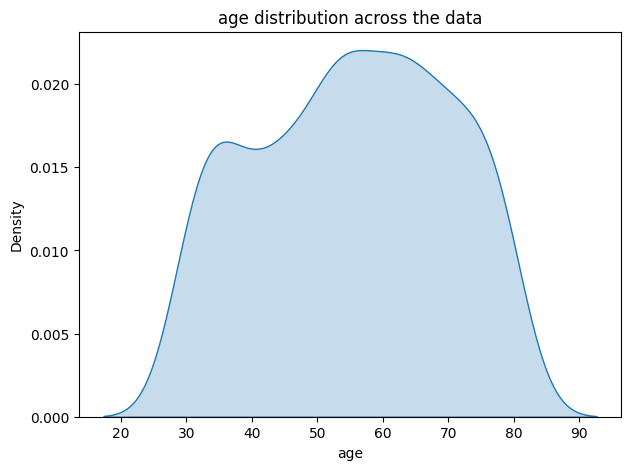

In [ ]:
plt.figure(figsize=(7, 5))
sns.kdeplot(data=df, x='age', fill=True)
plt.title('age distribution across the data')
plt.show()

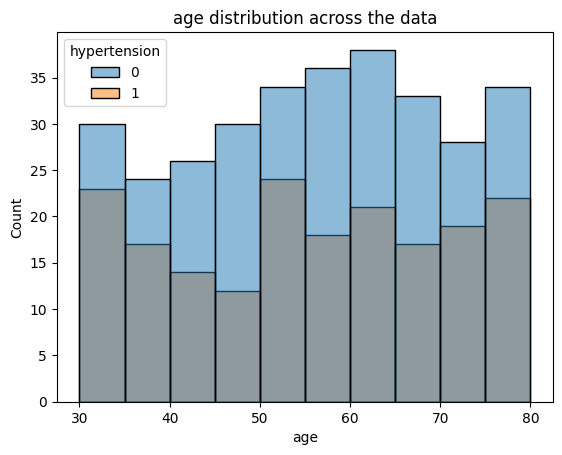

In [ ]:
sns.histplot(data = df, x= 'age',
            hue = 'hypertension')
plt.title('age distribution across the data')
plt.show()

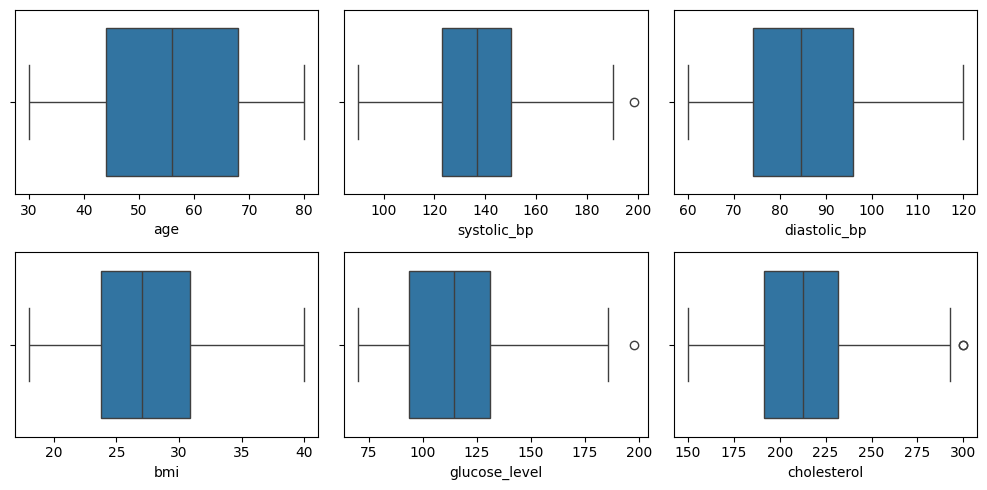

In [ ]:
num_vars = ['age', 'systolic_bp', 'diastolic_bp', 'bmi', 'glucose_level', 'cholesterol' ]

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

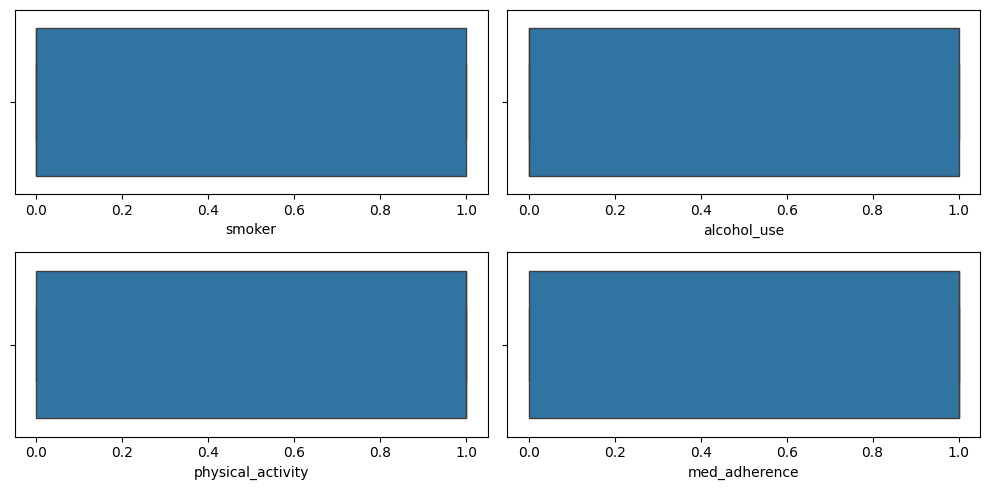

In [ ]:
num_vars = ['smoker', 'alcohol_use', 'physical_activity', 'med_adherence' ]

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))
axs = axs.flatten()

for i, var in enumerate(num_vars):
    sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

In [ ]:
# feature_columns = df.columsn[:-1]
# feature_target = df.columns[: -1]
# X = df[feature_columns]
# y = df[feature_target]

In [ ]:
X = df.drop ('hypertension', axis = 1)
y  = df['hypertension']

In [ ]:
# Apply Label Encoding to categorical columns ('gender')
from sklearn.preprocessing import LabelEncoder
# Check for object/string columns which might need encoding
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
label_encoders = {}
X_encoded = X.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X[col])
    label_encoders[col] = le # Save encoder for potential use later


In [ ]:
X_encoded.head()

,age,gender,systolic_bp,diastolic_bp,bmi,glucose_level,cholesterol,smoker,alcohol_use,physical_activity,med_adherence
0,68,0,142.511761,102.452282,28.052850,70.000000,300.000000,1,1,1,1
1,58,1,107.568212,71.060017,29.562498,138.892670,208.413120,0,0,0,0
2,44,1,144.701882,73.295475,25.396126,86.531929,221.485869,0,1,1,0
3,72,1,93.749487,94.602847,26.986992,77.609279,195.617258,0,0,0,0
4,37,0,181.839504,91.041524,30.730937,136.563769,210.080560,0,1,1,1


In [ ]:
# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")


Training set size: 400
Test set size: 100


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# build random forest classifier
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

# make predictions on test set
y_preds = RF.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_preds)

# Printing the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.86


In [ ]:
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the testing set
y_preds = xgb_model.predict(X_test)

# Calculating the accuracy of the model
accuracy = accuracy_score(y_test, y_preds)

# Printing the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.94


In [ ]:
def objective(trial):
    param = {
        'objective': 'binary:logistic',
        'eval_metric': 'auc',
        'booster': 'gbtree',
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 10),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 5),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 5),
        'random_state': 42,
        'use_label_encoder': False
    }

    X_train_opt, X_val_opt, y_train_opt, y_val_opt = train_test_split(
        X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
    )

    model = xgb.XGBClassifier(**param)
    model.fit(
        X_train_opt, y_train_opt,
        eval_set=[(X_val_opt, y_val_opt)],
        verbose=False
    )

    preds = model.predict_proba(X_val_opt)[:, 1]
    auc_score = roc_auc_score(y_val_opt, preds)
    return auc_score

In [ ]:
# Create and run the Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(objective, n_trials=50) # Reduced trials for demonstration; increase if needed

print("\nBest trial:")
print(study.best_trial)
print("Best parameters:", study.best_params)

[I 2025-08-02 13:31:59,202] A new study created in memory with name: no-name-4fef1580-32bc-4e51-93f5-b080fe03864e
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-02 13:31:59,713] Trial 0 finished with value: 1.0 and parameters: {'max_depth': 6, 'learning_rate': 0.28570714885887566, 'n_estimators': 759, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 1.5599452033620265, 'reg_alpha': 0.2904180608409973, 'reg_lambda': 4.330880728874676}. Best is trial 0 with value: 1.0.
/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [13:31:59] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
[I 2025-08-02 13:31:59,807] Trial 1 finished with value: 0.994 and parameters: {'


Best trial:
FrozenTrial(number=0, state=1, values=[1.0], datetime_start=datetime.datetime(2025, 8, 2, 13, 31, 59, 203707), datetime_complete=datetime.datetime(2025, 8, 2, 13, 31, 59, 713389), params={'max_depth': 6, 'learning_rate': 0.28570714885887566, 'n_estimators': 759, 'subsample': 0.7993292420985183, 'colsample_bytree': 0.5780093202212182, 'gamma': 1.5599452033620265, 'reg_alpha': 0.2904180608409973, 'reg_lambda': 4.330880728874676}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=12, log=False, low=3, step=1), 'learning_rate': FloatDistribution(high=0.3, log=False, low=0.01, step=None), 'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'subsample': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.5, step=None), 'gamma': FloatDistribution(high=10.0, log=False, low=0.0, step=None), 'reg_alpha': FloatDistribution(high=5.0, log=F

In [ ]:
# 5. Model Training with Best Parameters
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, random_state=42)
final_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5780093202212182, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=1.5599452033620265, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.28570714885887566,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=759, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
# 6. Model Evaluation
y_pred = final_model.predict(X_test)
y_pred_proba = final_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


--- Model Evaluation Metrics ---
Accuracy: 0.9900
F1 Score: 0.9863
AUC-ROC: 1.0000


In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[63  0]
 [ 1 36]]


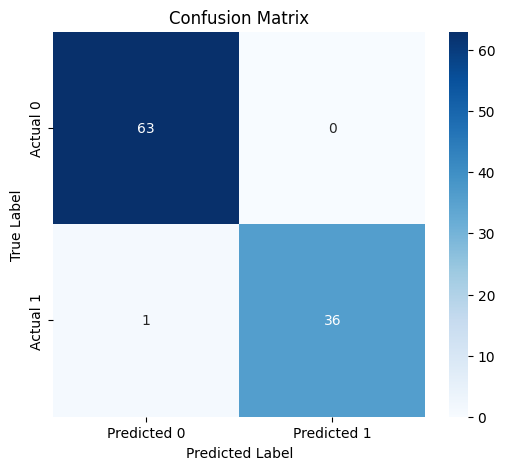

In [ ]:
# Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        63
           1       1.00      0.97      0.99        37

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [ ]:
# 7. SHAP Explanation
# Create SHAP explainer
explainer = shap.TreeExplainer(final_model)

In [ ]:
# Calculate SHAP values for the test set (or a sample for faster computation)
shap_values = explainer.shap_values(X_test)

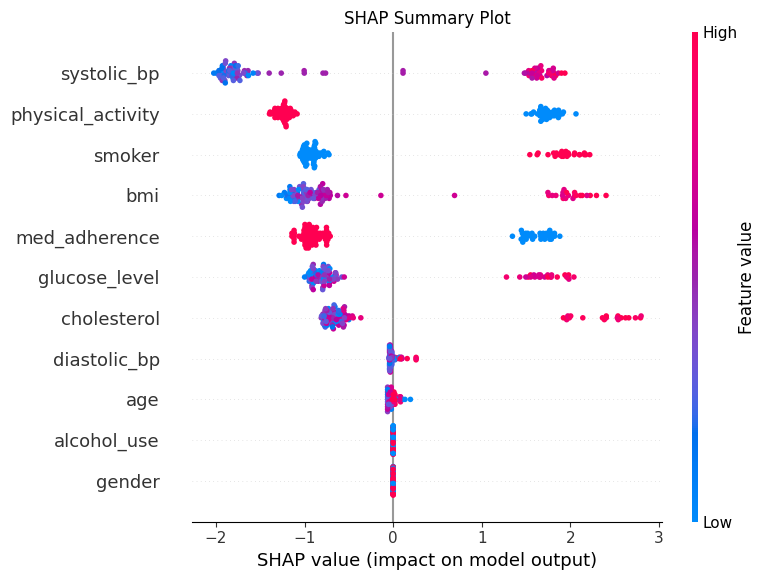

In [ ]:
# Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns, show=False)
plt.title('SHAP Summary Plot')
plt.tight_layout()
plt.show()

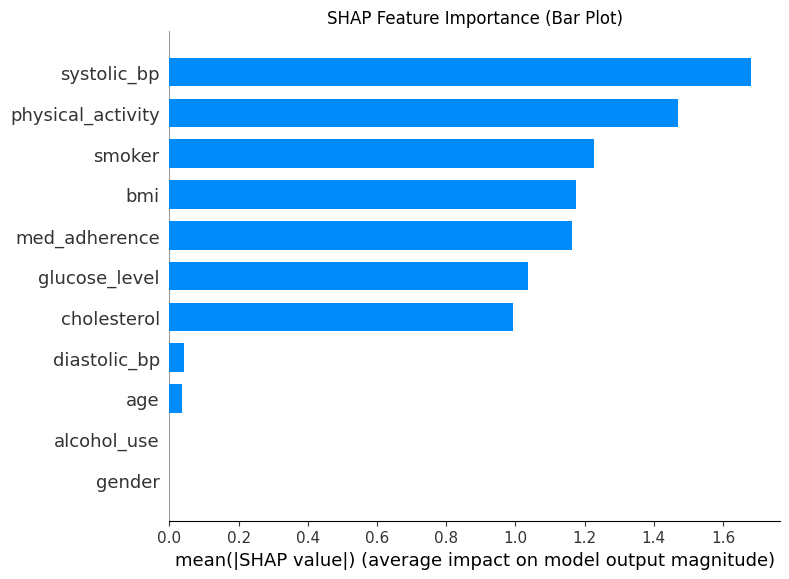

In [ ]:
# Bar Plot of Mean Absolute SHAP Values
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns, show=False)
plt.title('SHAP Feature Importance (Bar Plot)')
plt.tight_layout()
plt.show()

In [ ]:
# 8. Save the trained model
model_filename = 'model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(final_model, file)

print(f"\nModel saved to {model_filename}")

# Optionally, save the label encoders if they were used
if label_encoders:
    encoders_filename = 'label_encoders.pkl'
    with open(encoders_filename, 'wb') as file:
        pickle.dump(label_encoders, file)
    print(f"Label encoders saved to {encoders_filename}")



Model saved to model.pkl
Label encoders saved to label_encoders.pkl


In [ ]:
files.download('model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('label_encoders.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print("Model saved:", os.path.exists("model.pkl"))


Model saved: True


In [ ]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.6 MB/s eta 0:00:00


In [ ]:
# app.py
import streamlit as st
import pandas as pd
import numpy as np
import pickle
import shap
import matplotlib.pyplot as plt

In [ ]:
# --- Configuration ---
MODEL_PATH = 'model.pkl'
ENCODERS_PATH = 'label_encoders.pkl' # Assuming label encoders were saved in Step 1

# --- Load Model and Preprocessing Objects ---
@st.cache_resource # Cache to avoid reloading on every interaction
def load_model_and_encoders():
    """Load the trained model and label encoders."""
    try:
        with open(MODEL_PATH, 'rb') as f:
            model = pickle.load(f)
    except FileNotFoundError:
        st.error(f"Model file '{MODEL_PATH}' not found. Please ensure it exists in the same directory.")
        st.stop()
    except Exception as e:
        st.error(f"Error loading model: {e}")
        st.stop()

    try:
        with open(ENCODERS_PATH, 'rb') as f:
            encoders = pickle.load(f)
    except FileNotFoundError:
        st.warning(f"Encoders file '{ENCODERS_PATH}' not found. Assuming no categorical encoding needed or handled differently.")
        encoders = {}
    except Exception as e:
        st.error(f"Error loading encoders: {e}")
        st.stop()

    return model, encoders

model, encoders = load_model_and_encoders()


2025-08-02 14:39:19.556 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.667 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-08-02 14:39:19.667 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.669 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.671 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.698 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.700 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-02 14:39:19.702 Thread 'MainThread': mi

In [ ]:
# --- SHAP Explainer ---
# Initialize the SHAP explainer once the model is loaded
@st.cache_resource
def load_shap_explainer(model):
    """Create SHAP explainer."""
    try:
        explainer = shap.TreeExplainer(model)
        return explainer
    except Exception as e:
        st.error(f"Error initializing SHAP explainer: {e}")
        return None

explainer = load_shap_explainer(model)

UnhashableParamError: Cannot hash argument 'model' (of type `xgboost.sklearn.XGBClassifier`) in 'load_shap_explainer'.

To address this, you can tell Streamlit not to hash this argument by adding a
leading underscore to the argument's name in the function signature:

```
@st.cache_resource
def load_shap_explainer(_model, ...):
    ...
```
            

In [ ]:



# --- Streamlit UI ---
st.title("Hypertension Risk Prediction App")
st.markdown("""
This app predicts the risk of hypertension based on patient data and explains the prediction using SHAP.
""")

# --- Input Form ---
st.header("Patient Information")

# Assuming column order based on data inspection and typical structure
# Feature columns (excluding the target 'risk_score' which is the last column)
feature_names = [
    'age', 'gender', 'systolic_bp', 'diastolic_bp', 'bmi',
    'glucose_level', 'cholesterol', 'smoker', 'alcohol_use',
    'physical_activity', 'med_adherence'
]

# Create input widgets for each feature
# Using a dictionary to store inputs for easy conversion to DataFrame later
input_data = {}

# Numerical Inputs
input_data['age'] = st.number_input("Age", min_value=0, max_value=120, value=50, step=1)
input_data['systolic_bp'] = st.number_input("Systolic Blood Pressure (mmHg)", min_value=50.0, max_value=250.0, value=120.0, step=1.0)
input_data['diastolic_bp'] = st.number_input("Diastolic Blood Pressure (mmHg)", min_value=30.0, max_value=150.0, value=80.0, step=1.0)
input_data['bmi'] = st.number_input("Body Mass Index (BMI)", min_value=10.0, max_value=50.0, value=25.0, step=0.1)
input_data['glucose_level'] = st.number_input("Glucose Level (mg/dL)", min_value=50.0, max_value=300.0, value=100.0, step=1.0)
input_data['cholesterol'] = st.number_input("Cholesterol Level (mg/dL)", min_value=100.0, max_value=400.0, value=200.0, step=1.0)

# Categorical Inputs
# Assuming 'gender' is categorical and needs encoding
# Get unique categories if encoder exists, otherwise use default
if 'gender' in encoders:
    gender_options = encoders['gender'].classes_.tolist()
else:
    gender_options = ['Male', 'Female'] # Default assumption
input_data['gender'] = st.selectbox("Gender", options=gender_options)

# Binary Inputs (Yes/No -> 1/0)
input_data['smoker'] = st.radio("Smoker?", options=['No', 'Yes'], index=1) # Default Yes for demo
input_data['alcohol_use'] = st.radio("Alcohol Use?", options=['No', 'Yes'], index=1)
input_data['physical_activity'] = st.radio("Regular Physical Activity?", options=['No', 'Yes'], index=0) # Default No
input_data['med_adherence'] = st.radio("Medication Adherence?", options=['No', 'Yes'], index=1) # Default Yes

# Convert Yes/No to 1/0
input_data['smoker'] = 1 if input_data['smoker'] == 'Yes' else 0
input_data['alcohol_use'] = 1 if input_data['alcohol_use'] == 'Yes' else 0
input_data['physical_activity'] = 1 if input_data['physical_activity'] == 'Yes' else 0
input_data['med_adherence'] = 1 if input_data['med_adherence'] == 'Yes' else 0

# --- Prediction Button ---
if st.button("Predict Risk"):
    # 1. Prepare Data
    # Convert input data dictionary to DataFrame
    input_df = pd.DataFrame([input_data])

    # Ensure column order matches training data (important!)
    # This assumes the model was trained with features in the order defined by `feature_names`
    # If your training data had a different order, adjust `feature_names` accordingly.
    try:
        input_df = input_df[feature_names]
    except KeyError as e:
        st.error(f"Input data is missing required columns or column names do not match: {e}")
        st.stop()

    # 2. Preprocess (Encode categorical variables)
    input_df_processed = input_df.copy()
    for col, encoder in encoders.items():
        if col in input_df_processed.columns:
            try:
                # Handle unseen labels if necessary (e.g., by adding a default category or raising an error)
                # For simplicity, we assume the input will be from known categories.
                input_df_processed[col] = encoder.transform(input_df_processed[col])
            except ValueError as e:
                st.error(f"Error encoding '{col}': {e}. Please check the input value.")
                st.stop()

    # 3. Predict
    try:
        prediction = model.predict(input_df_processed)[0]
        prediction_proba = model.predict_proba(input_df_processed)[0]
    except Exception as e:
        st.error(f"Error during prediction: {e}")
        st.stop()

    # 4. Display Prediction Output
    st.subheader("Prediction Result")
    risk_text = "**High Risk**" if prediction == 1 else "**Low Risk**"
    st.markdown(f"Predicted Risk Score: {prediction} ({risk_text})")
    st.markdown(f"Probability of Low Risk: {prediction_proba[0]:.2%}")
    st.markdown(f"Probability of High Risk: {prediction_proba[1]:.2%}")

    # 5. Visualize SHAP Explanation
    if explainer:
        st.subheader("Prediction Explanation (SHAP)")
        st.markdown("This plot shows how each feature contributed to the prediction for this specific patient.")
        try:
            # Calculate SHAP values for the single input
            shap_values = explainer.shap_values(input_df_processed)

            # Waterfall plot for the specific prediction
            # shap.waterfall_plot requires an Explanation object, which explainer expects for newer SHAP versions
            # For shap_values returned by TreeExplainer.shap_values, we need to create it slightly differently
            # Let's use the expected_value from the explainer and the calculated shap_values

            # For binary classification, shap_values is a list [shap_class_0, shap_class_1]
            # We usually explain the positive class (class 1)
            shap_values_for_class_1 = shap_values[1] if isinstance(shap_values, list) else shap_values

            # Create an Explanation object for waterfall plot
            # explainer.expected_value[1] is the base value for class 1
            base_value = explainer.expected_value[1] if isinstance(explainer.expected_value, (list, np.ndarray)) else explainer.expected_value
            feature_values = input_df_processed.iloc[0] # Get the single row of feature values

            # Generate Waterfall Plot
            fig, ax = plt.subplots(figsize=(8, 6)) # Adjust size as needed
            shap.waterfall_plot(
                shap.Explanation(
                    values=shap_values_for_class_1[0], # SHAP values for the first (and only) sample
                    base_values=base_value, # Base value (average model output)
                    data=feature_values, # Feature values for the sample
                    feature_names=feature_names # Feature names
                ),
                show=False, # Important for Streamlit
                max_display=10 # Show top 10 features
            )
            plt.tight_layout()
            st.pyplot(fig) # Display the plot in Streamlit
            plt.close(fig) # Close the figure to free memory

        except Exception as e:
            st.error(f"Error generating SHAP explanation: {e}")
            # Fallback: Show summary plot if individual fails (less ideal for single prediction)
            # This would require calculating SHAP for a larger set or using approximate methods.
            # st.write("Could not generate individual explanation. Showing general feature importance.")
            # shap.summary_plot(shap_values, input_df_processed, feature_names=feature_names, show=False)
            # st.pyplot(plt.gcf())
            # plt.close()
    else:
        st.warning("SHAP explainer could not be initialized. Explanation not available.")

    # 6. Display Treatment Suggestions
    st.subheader("Treatment Suggestions")
    if prediction == 1: # High Risk
        st.info("**High Risk Patient Detected:**")
        suggestions = []
        if input_data['systolic_bp'] > 140 or input_data['diastolic_bp'] > 90:
            suggestions.append("- Blood pressure is elevated. Review current antihypertensive regimen and consider adjustments.")
        if input_data['bmi'] > 30:
            suggestions.append("- BMI indicates obesity. Recommend weight loss program and dietary counseling.")
        if input_data['cholesterol'] > 200:
            suggestions.append("- Cholesterol levels are high. Consider lipid-lowering therapy.")
        if input_data['glucose_level'] > 126:
            suggestions.append("- Glucose level is high. Screen for diabetes and manage accordingly.")
        if input_data['smoker'] == 1:
            suggestions.append("- Smoking cessation is critical. Provide resources and support for quitting.")
        if input_data['alcohol_use'] == 1:
             suggestions.append("- Excessive alcohol use. Advise moderation or cessation.")
        if input_data['physical_activity'] == 0:
            suggestions.append("- Lack of physical activity. Encourage regular exercise (e.g., 150 min moderate/week).")
        if input_data['med_adherence'] == 0:
            suggestions.append("- Poor medication adherence. Discuss barriers and strategies to improve compliance.")

        suggestions.append("- Schedule regular follow-ups to monitor progress.")
        suggestions.append("- Refer to a specialist (e.g., cardiologist) if risk factors are complex or uncontrolled.")

        for suggestion in suggestions:
            st.write(suggestion)

    else: # Low Risk
        st.success("**Low Risk Patient:**")
        st.write("- Continue current management plan.")
        st.write("- Maintain healthy lifestyle habits (balanced diet, regular exercise, no smoking).")
        st.write("- Schedule routine check-ups as recommended.")


UnhashableParamError: Cannot hash argument 'model' (of type `xgboost.sklearn.XGBClassifier`) in 'load_shap_explainer'.

To address this, you can tell Streamlit not to hash this argument by adding a
leading underscore to the argument's name in the function signature:

```
@st.cache_resource
def load_shap_explainer(_model, ...):
    ...
```
            